In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Algerian_forest_fires_dataset.csv")

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


## data cleaning 

In [5]:
data.isnull().sum()
# row wise 
# it give no. of missing data set 

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [6]:
data[data.isnull().any(axis= 1)]
# column wise 
# it shows the  complete row having missing data 


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [7]:
# it's looks like value is misspaced so we can use str.strip() method
data.Classes = data["Classes"].str.strip()

##data is converted into two set based on region from 123th index we can make a new column based on this region 
1.Bejaia Region Dataset
2.Sidi-Bel Abbes Region Dataset

In [8]:
# adding new column 
data.loc[:123,"region"] = 0
data.loc[123:,"region"] = 1
df = data
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
237,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
238,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
239,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  region       241 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.4+ KB


In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df.region = df.region.astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  region       241 non-null    int32  
dtypes: float64(7), int32(1), int64(6), object(1)
memory usage: 27.4+ KB


In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [14]:
df = df.dropna().reset_index(drop = True)

In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [16]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
237,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
238,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
239,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [17]:
# df = df.isnull().any(axis = 1)
# same
df[df.isnull().any(axis= 1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [19]:
df.iloc[[122]]
# it's is not fine 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0


In [20]:
df = df.drop(122).reset_index(drop = True)

In [21]:
df.iloc[[122]]
# now it's fine 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1


In [22]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  region       240 non-null    int32  
dtypes: float64(7), int32(1), int64(6), object(1)
memory usage: 27.3+ KB


In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [24]:
# fix spaces in columns name 
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  region       240 non-null    int32  
dtypes: float64(7), int32(1), int64(6), object(1)
memory usage: 27.3+ KB


In [26]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int32  
 1   month        240 non-null    int32  
 2   year         240 non-null    int32  
 3   Temperature  240 non-null    int32  
 4   RH           240 non-null    int32  
 5   Ws           240 non-null    int32  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  region       240 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.7+ KB


In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
objects = [features for features in df.columns if df[features].dtypes  == "object"]
objects

['Classes']

In [30]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)
        
    

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int32  
 1   month        240 non-null    int32  
 2   year         240 non-null    int32  
 3   Temperature  240 non-null    int32  
 4   RH           240 non-null    int32  
 5   Ws           240 non-null    int32  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  region       240 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.7+ KB


# Exploratory Data Analysis

In [32]:
# drop day,month and year
df_copy = df.drop(['day', 'month', 'year'],axis = 1)

In [33]:
# encoding of categories of classes 
df_copy['Classes'] =np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [37]:
## let ave the cleaned the ave data 
df_copy.to_csv('Algerian_forest_fires_cleaned_1_dataset.csv',index = False)


In [38]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
236,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
237,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
238,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [39]:
df_copy.Classes.value_counts()

Classes
1    137
0    103
Name: count, dtype: int64

In [84]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [85]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
236,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [86]:
df_copy.Classes.value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

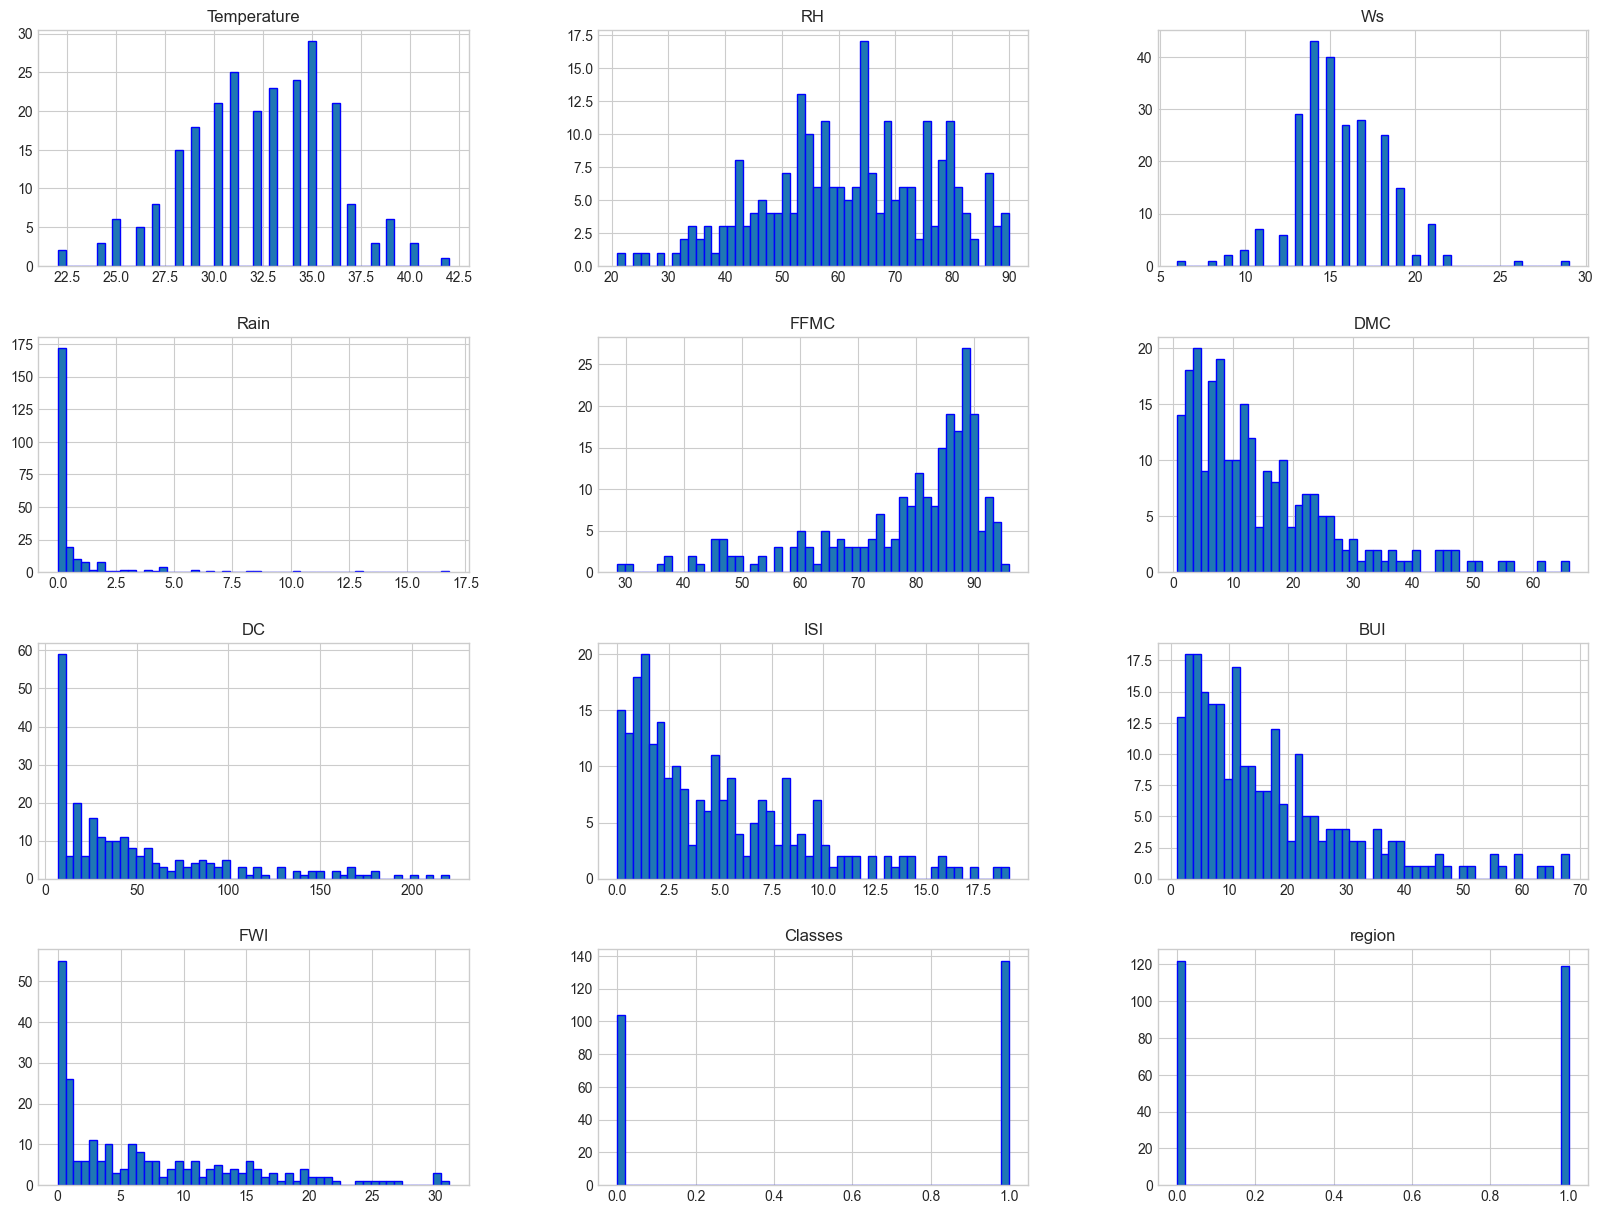

In [87]:
# plot desnity plot for all features
plt.style.use("seaborn-v0_8-whitegrid")
df_copy.hist(bins = 50,figsize = (20,15),ec = 'b')
plt.show()

In [88]:
## percentage for pie chart 
percentage_ = df_copy['Classes'].value_counts(normalize = True)*100

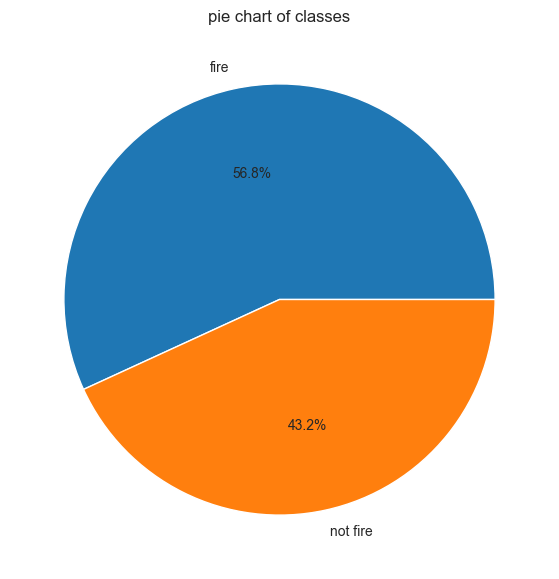

In [89]:
# ploting pie chart
classlabels = ['fire','not fire']
plt.figure(figsize = (12,7))
plt.pie(percentage_,labels = classlabels,autopct = '%1.1f%%')
plt.title("pie chart of classes")
plt.show()


# corelation

In [90]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651184,-0.288538,-0.324519,0.679353,0.485406,0.375432,0.604182,0.459374,0.566649,0.516166,0.273554
RH,-0.651184,1.000000,0.251609,0.219067,-0.643718,-0.405444,-0.223201,-0.685228,-0.350446,-0.578951,-0.428928,-0.410789
Ws,-0.288538,0.251609,1.000000,0.179167,-0.182322,-0.009466,0.072004,-0.000320,0.023004,0.024420,-0.080857,-0.173839
Rain,-0.324519,0.219067,0.179167,1.000000,-0.541693,-0.285066,-0.294782,-0.344192,-0.296227,-0.321227,-0.375657,-0.047080
FFMC,0.679353,-0.643718,-0.182322,-0.541693,1.000000,0.599438,0.502847,0.737525,0.587699,0.688538,0.766622,0.237933
DMC,0.485406,-0.405444,-0.009466,-0.285066,0.599438,1.000000,0.875084,0.677847,0.982107,0.874943,0.581867,0.201872
DC,0.375432,-0.223201,0.072004,-0.294782,0.502847,0.875084,1.000000,0.505104,0.941620,0.737783,0.507224,-0.072004
ISI,0.604182,-0.685228,-0.000320,-0.344192,0.737525,0.677847,0.505104,1.000000,0.641194,0.922326,0.732736,0.273803
BUI,0.459374,-0.350446,0.023004,-0.296227,0.587699,0.982107,0.941620,0.641194,1.000000,0.856918,0.582868,0.098330
FWI,0.566649,-0.578951,0.024420,-0.321227,0.688538,0.874943,0.737783,0.922326,0.856918,1.000000,0.716898,0.206362


<Axes: >

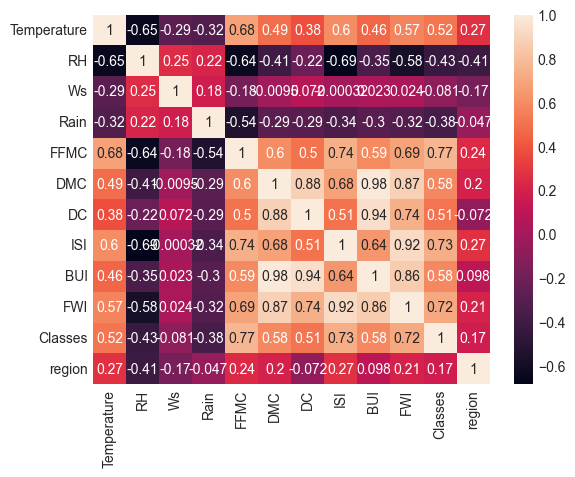

In [91]:
sns.heatmap(df_copy.corr(),annot = True)


<Axes: ylabel='FWI'>

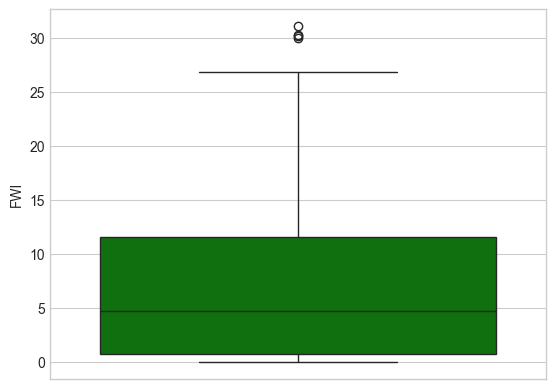

In [92]:
# boxplot
sns.boxplot(df['FWI'],color = 'green')


In [93]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


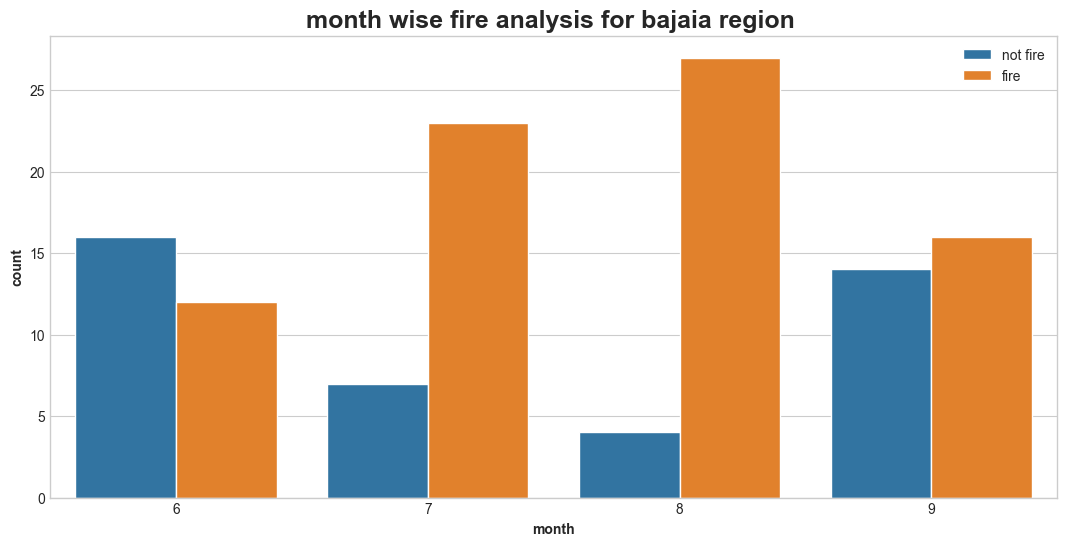

In [94]:
# monthly fire analysis 
df_temp = data.loc[data['region'] == 1]
plt.subplots(figsize = (13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue ='Classes', data = df_temp)
plt.title("month wise fire analysis for bajaia region ",fontsize = 18,weight = 'bold')
plt.ylabel("count",weight = 'bold')
plt.xlabel("month",weight = 'bold')
plt.legend(loc = "upper right")

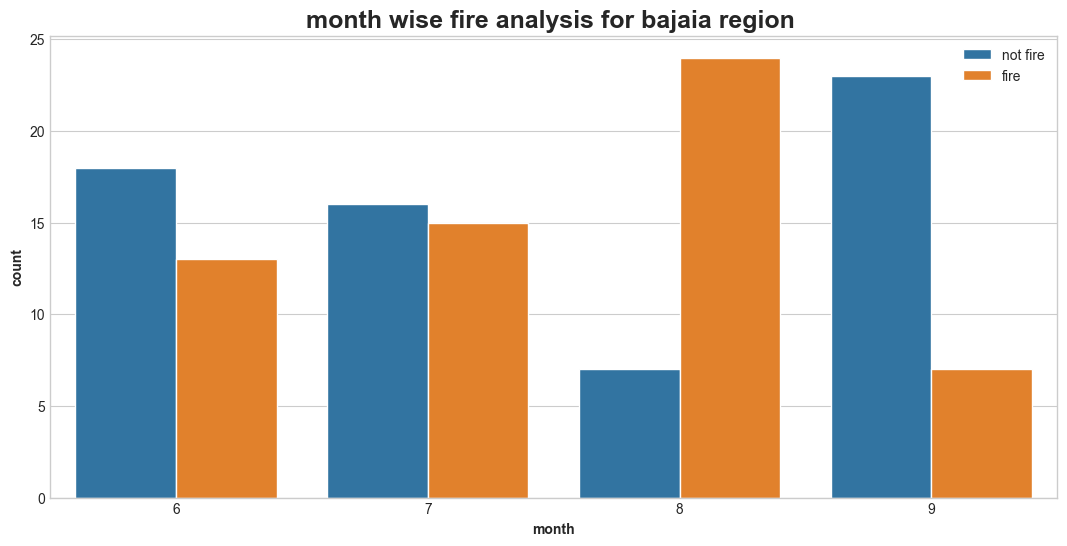

In [95]:
# monthly fire analysis 
df_temp = data.loc[data['region'] == 0]
plt.subplots(figsize = (13,6))
sns.set_style("whitegrid")
sns.countplot(x = "month",hue ='Classes', data = df_temp)
plt.title("month wise fire analysis for bajaia region ",fontsize = 18,weight = 'bold')
plt.ylabel("count",weight = 'bold')
plt.xlabel("month",weight = 'bold')
plt.legend(loc = "upper right")

In [96]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


## it observed that august and september had the most number of forest fires for both regions  and from the above plot of months we can understand few things 
## most of the fire happend in  august and very high fires happened in only 3 mounths - june,july ,august
## less fire was on september 